# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [1]:
#import your libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np

#your info here
__author__ = "Rick Takeuchi"
__email__ = "mrtakeuc@ucsc.edu"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_ft_df = pd.read_csv('train_features.csv')
train_sal_df = pd.read_csv('train_salaries.csv')
test_ft_df = pd.read_csv('test_features.csv')

### ---- 3 Clean the data ----

In [3]:
train_ft_df.head(10)

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
5  JOB1362684407692    COMP15         MANAGER     DOCTORAL    COMPSCI   
6  JOB1362684407693    COMP15             CFO         NONE       NONE   
7  JOB1362684407694    COMP24          JUNIOR    BACHELORS  CHEMISTRY   
8  JOB1362684407695    COMP20         JANITOR  HIGH_SCHOOL       NONE   
9  JOB1362684407696    COMP41  VICE_PRESIDENT    BACHELORS  CHEMISTRY   

    industry  yearsExperience  milesFromMetropolis  
0     HEALTH               10                   83  
1        WEB                3                   73  
2     HEALTH               10                   38  
3       AUTO                8                   17  
4    FINANCE                8                   16  
5    FINANCE                2                   31  
6     HEALTH               23                   24  
7  EDUCATION                9                   70  
8  EDUCATION                1                   54  
9       AUTO               17                   68

In [4]:
train_sal_df.head(10)

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
5  JOB1362684407692     113
6  JOB1362684407693     178
7  JOB1362684407694      73
8  JOB1362684407695      31
9  JOB1362684407696     104

In [5]:
test_ft_df.head(10)

jobId companyId         jobType       degree    major industry  \
0  JOB1362685407687    COMP33         MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13          JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10             CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21         MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36          JUNIOR     DOCTORAL  BIOLOGY      OIL   
5  JOB1362685407692    COMP40             CTO      MASTERS  COMPSCI  FINANCE   
6  JOB1362685407693    COMP32          SENIOR      MASTERS  COMPSCI  SERVICE   
7  JOB1362685407694    COMP11             CEO    BACHELORS  BIOLOGY  SERVICE   
8  JOB1362685407695    COMP39         MANAGER     DOCTORAL  PHYSICS   HEALTH   
9  JOB1362685407696    COMP22  VICE_PRESIDENT         NONE     NONE     AUTO   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44  
5                6                   23  
6                6                   32  
7                9                   73  
8                6                   78  
9               23                   97

In [6]:
train_ft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 38.1+ MB


In [7]:
train_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ MB


In [8]:
test_ft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 38.1+ MB


In [9]:
train_ft_df.duplicated().sum()

0

In [10]:
train_sal_df.duplicated().sum()

0

In [11]:
test_ft_df.duplicated().sum()

0

In [12]:
train_ft_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [14]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [15]:
train_ft_df.describe(include = [np.number])

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [16]:
train_ft_df.describe(include = ['O'])

jobId companyId  jobType       degree    major industry
count            1000000   1000000  1000000      1000000  1000000  1000000
unique           1000000        63        8            5        9        7
top     JOB1362684939906    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB
freq                   1     16193   125886       236976   532355   143206

In [17]:
train_df = pd.merge(train_sal_df, train_ft_df, on='jobId')

In [18]:
#delete train_sal_df
#delete train_ft_df

### ---- 4 Explore the data (EDA) ----

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   salary               1000000 non-null  int64 
 2   companyId            1000000 non-null  object
 3   jobType              1000000 non-null  object
 4   degree               1000000 non-null  object
 5   major                1000000 non-null  object
 6   industry             1000000 non-null  object
 7   yearsExperience      1000000 non-null  int64 
 8   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 53.4+ MB


In [20]:
train_df.head()

jobId  salary companyId         jobType       degree      major  \
0  JOB1362684407687     130    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688     101    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689     137    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690     142    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     163     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

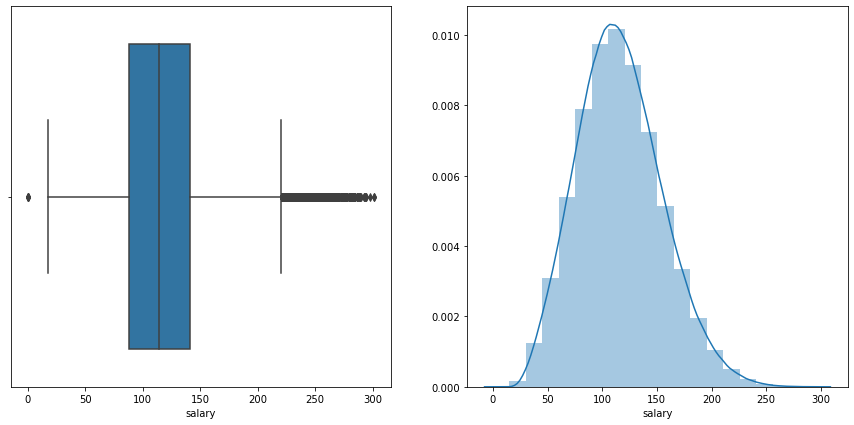

In [21]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()


In [22]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for predicted outliers are {} and {}.'.format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for predicted outliers are 220.5 and 8.5.


In [23]:
train_df[train_df.salary < 8.5]

jobId  salary companyId         jobType       degree  \
30559   JOB1362684438246       0    COMP44          JUNIOR     DOCTORAL   
495984  JOB1362684903671       0    COMP34          JUNIOR         NONE   
652076  JOB1362685059763       0    COMP25             CTO  HIGH_SCHOOL   
816129  JOB1362685223816       0    COMP42         MANAGER     DOCTORAL   
828156  JOB1362685235843       0    COMP40  VICE_PRESIDENT      MASTERS   

              major industry  yearsExperience  milesFromMetropolis  
30559          MATH     AUTO               11                    7  
495984         NONE      OIL                1                   25  
652076         NONE     AUTO                6                   60  
816129  ENGINEERING  FINANCE               18                    6  
828156  ENGINEERING      WEB                3                   29

In [24]:
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [25]:
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

jobId  salary companyId jobType     degree        major  \
1222    JOB1362684408909     225    COMP40  JUNIOR    MASTERS      COMPSCI   
27710   JOB1362684435397     246    COMP21  JUNIOR   DOCTORAL  ENGINEERING   
31355   JOB1362684439042     225    COMP45  JUNIOR   DOCTORAL      COMPSCI   
100042  JOB1362684507729     248    COMP17  JUNIOR   DOCTORAL     BUSINESS   
160333  JOB1362684568020     223    COMP18  JUNIOR   DOCTORAL     BUSINESS   
189582  JOB1362684597269     221    COMP32  JUNIOR   DOCTORAL     BUSINESS   
214606  JOB1362684622293     222    COMP47  JUNIOR    MASTERS     BUSINESS   
303778  JOB1362684711465     226    COMP51  JUNIOR    MASTERS  ENGINEERING   
348354  JOB1362684756041     226    COMP56  JUNIOR   DOCTORAL  ENGINEERING   
427593  JOB1362684835280     221    COMP54  JUNIOR   DOCTORAL  ENGINEERING   
500739  JOB1362684908426     227    COMP40  JUNIOR   DOCTORAL  ENGINEERING   
627534  JOB1362685035221     230     COMP5  JUNIOR   DOCTORAL  ENGINEERING   
645555  JOB1362685053242     225    COMP36  JUNIOR   DOCTORAL     BUSINESS   
656572  JOB1362685064259     222    COMP28  JUNIOR   DOCTORAL     BUSINESS   
685775  JOB1362685093462     225    COMP38  JUNIOR  BACHELORS  ENGINEERING   
743326  JOB1362685151013     236    COMP14  JUNIOR   DOCTORAL     BUSINESS   
787674  JOB1362685195361     232    COMP43  JUNIOR   DOCTORAL     BUSINESS   
796956  JOB1362685204643     228    COMP30  JUNIOR    MASTERS     BUSINESS   
855219  JOB1362685262906     225    COMP13  JUNIOR    MASTERS  ENGINEERING   
954368  JOB1362685362055     223    COMP11  JUNIOR   DOCTORAL     BUSINESS   

       industry  yearsExperience  milesFromMetropolis  
1222        OIL               24                    5  
27710       OIL               24                    3  
31355   FINANCE               24                    0  
100042  FINANCE               23                    8  
160333  FINANCE               22                    3  
189582      OIL               24                   11  
214606  FINANCE               22                    4  
303778      WEB               24                    2  
348354      OIL               23                   25  
427593  FINANCE               23                    3  
500739      OIL               21                    0  
627534      OIL               24                   29  
645555  FINANCE               24                    1  
656572      OIL               22                    3  
685775      OIL               24                   13  
743326  FINANCE               19                    0  
787674  FINANCE               18                   15  
796956      OIL               24                    2  
855219      OIL               22                   26  
954368      OIL               24                   26

### ---- 5 Establish a baseline ----

In [26]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

In [27]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


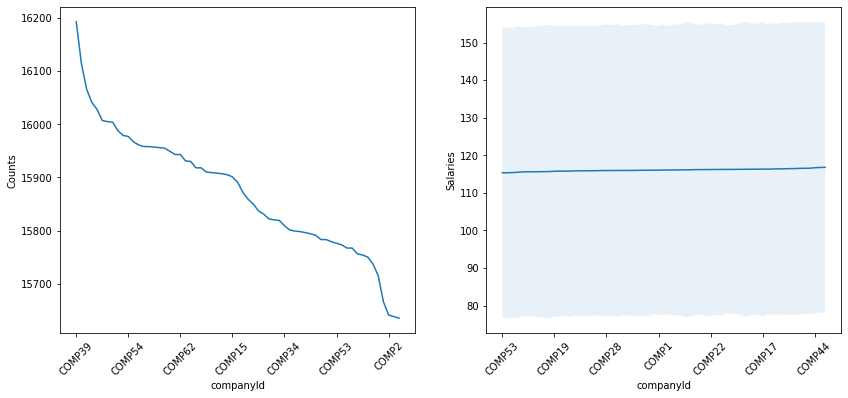

In [28]:
plot_feature(train_df, 'companyId')

C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


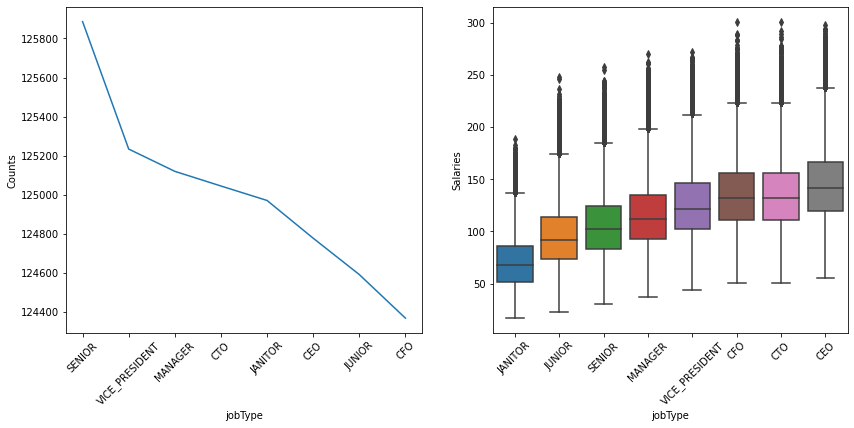

In [29]:
plot_feature(train_df, 'jobType')

C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


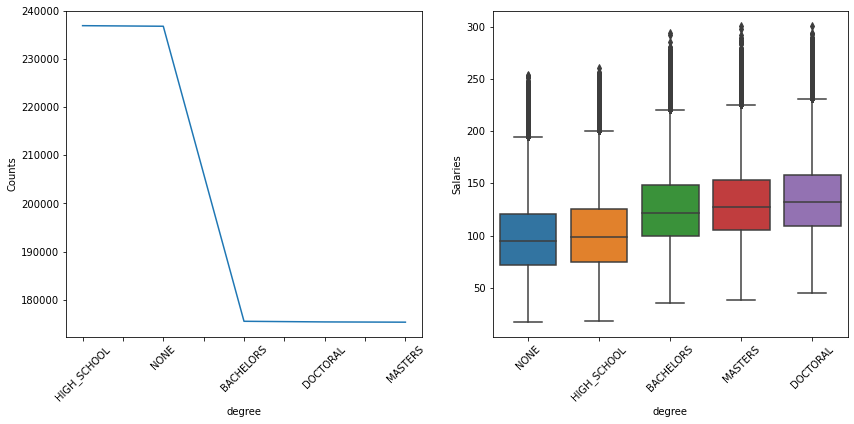

In [30]:
plot_feature(train_df, 'degree')

C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


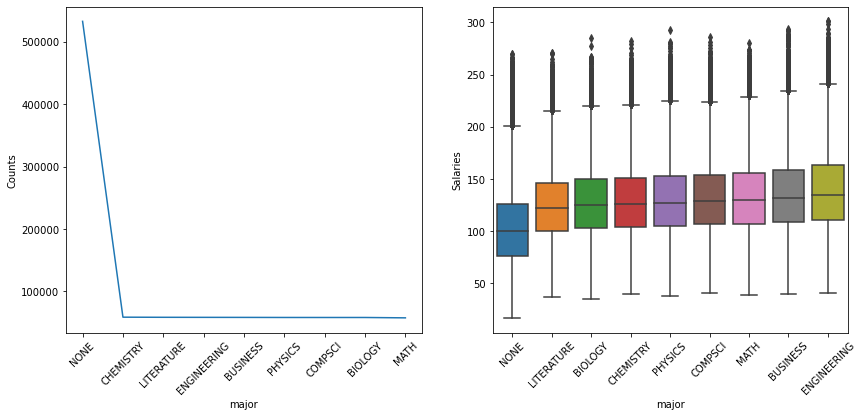

In [31]:
plot_feature(train_df, 'major')

C:\Users\mrtak\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


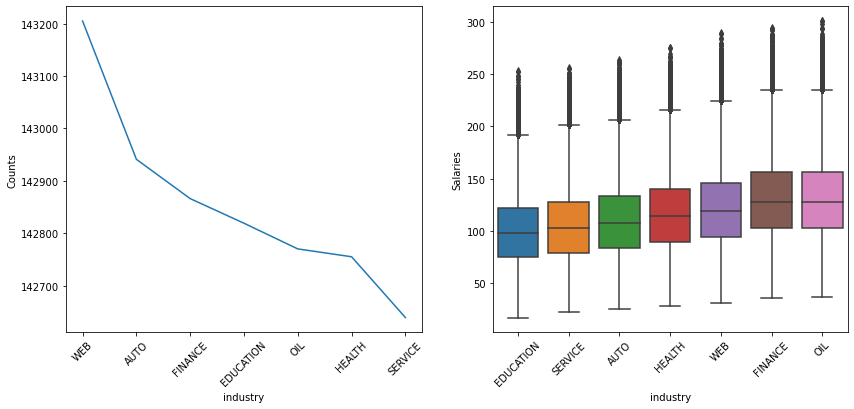

In [32]:
plot_feature(train_df, 'industry')

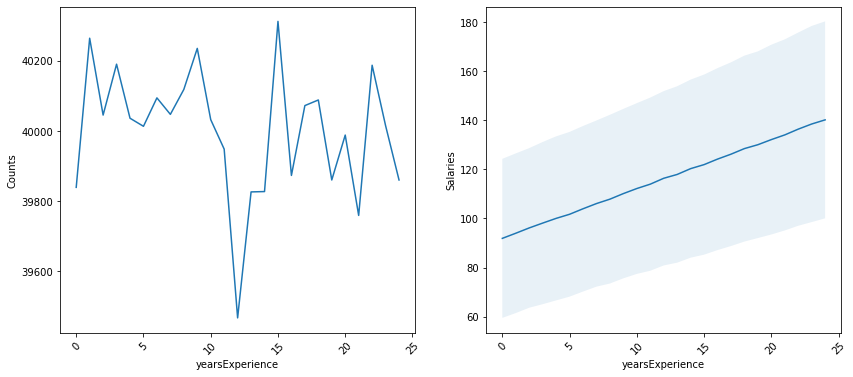

In [33]:
plot_feature(train_df, 'yearsExperience')

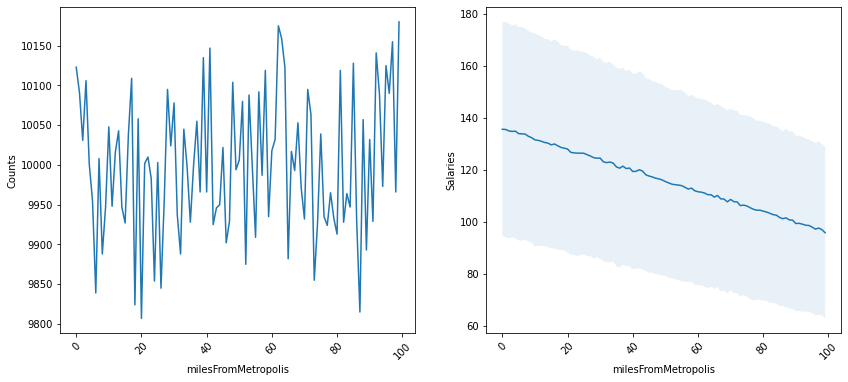

In [34]:
plot_feature(train_df, 'milesFromMetropolis')

### ---- 6 Hypothesize solution ----

In [35]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [36]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

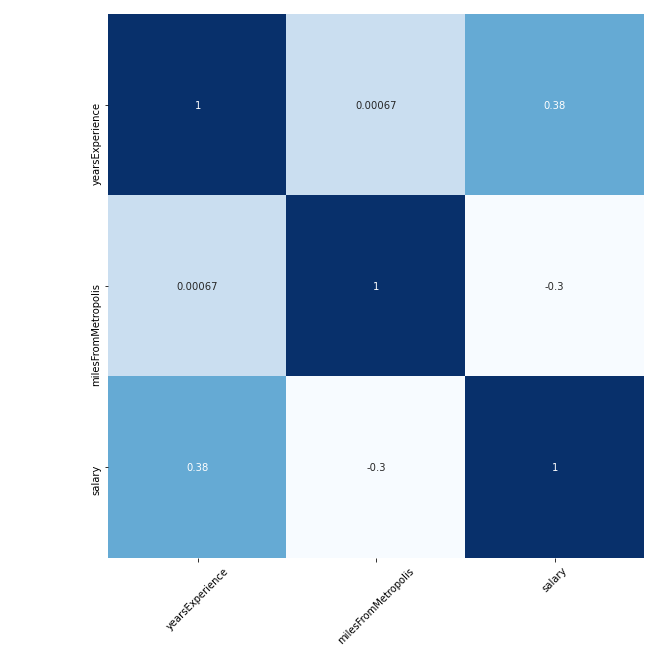

In [37]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()